In [15]:
#import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [16]:
#Store the data into the df variable
df = pd.read_csv('../../data/ETH.csv')

In [17]:
#Set the date as the index for the data
df = df.set_index(pd.DatetimeIndex(df['begins_at'].values))
df['price'] = df[['high_price','low_price']].mean(axis=1)

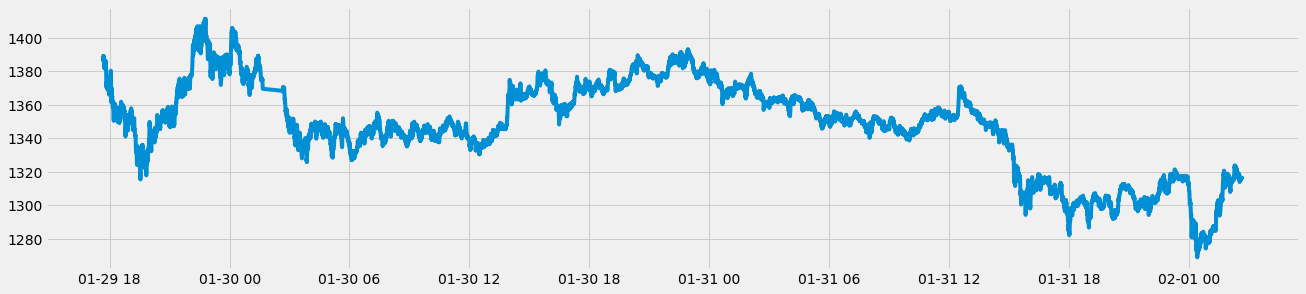

In [18]:
# Visually Show The Stock Price(s)
# Create the title
title = 'ETH Price'
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['price'],  label='price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

# just_ema = df.price.ewm(span=400, adjust=False).mean()
# plt.plot(df.index, just_ema, label='Exponential moving average', color = 'red')

# plt.xticks(rotation=45) 
# plt.title(title)
# plt.xlabel('Date',fontsize=18)
# plt.ylabel('Price USD ($)',fontsize=18)
# plt.show()

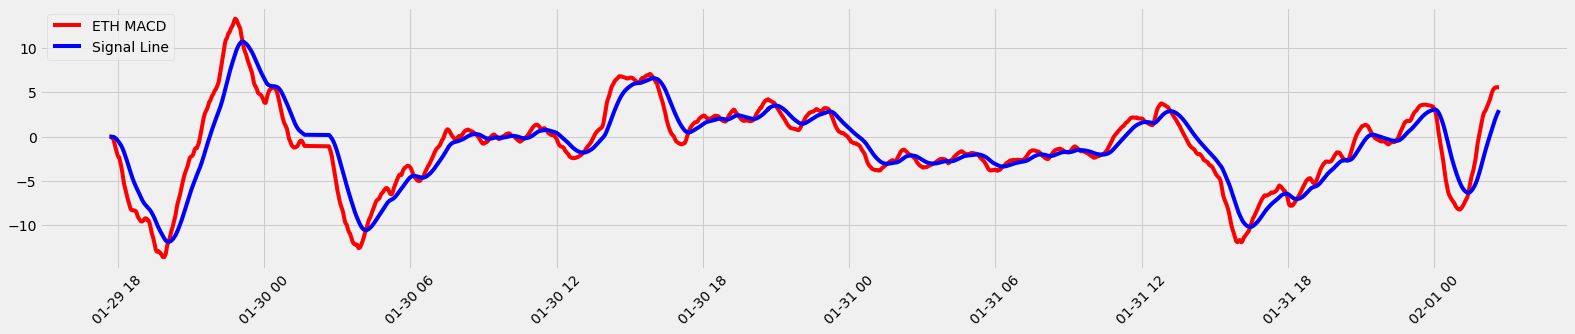

In [19]:
macd_params = (12, 26, 9)
macd_multiplier = 25
ShortEMA = df.price.ewm(span=macd_params[0]*macd_multiplier, adjust=False).mean() #AKA Fast moving average
LongEMA = df.price.ewm(span=macd_params[1]*macd_multiplier, adjust=False).mean() #AKA Slow moving average
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=macd_params[2]*macd_multiplier, adjust=False).mean()

plt.figure(figsize=(12.2*2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='ETH MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()
# profit, trans = mac_daddy_tester(MACD, signal, df)
# print((i, profit))
# t.insert((i, profit))

In [20]:
df['MACD'] = MACD
df['Signal Line'] = signal

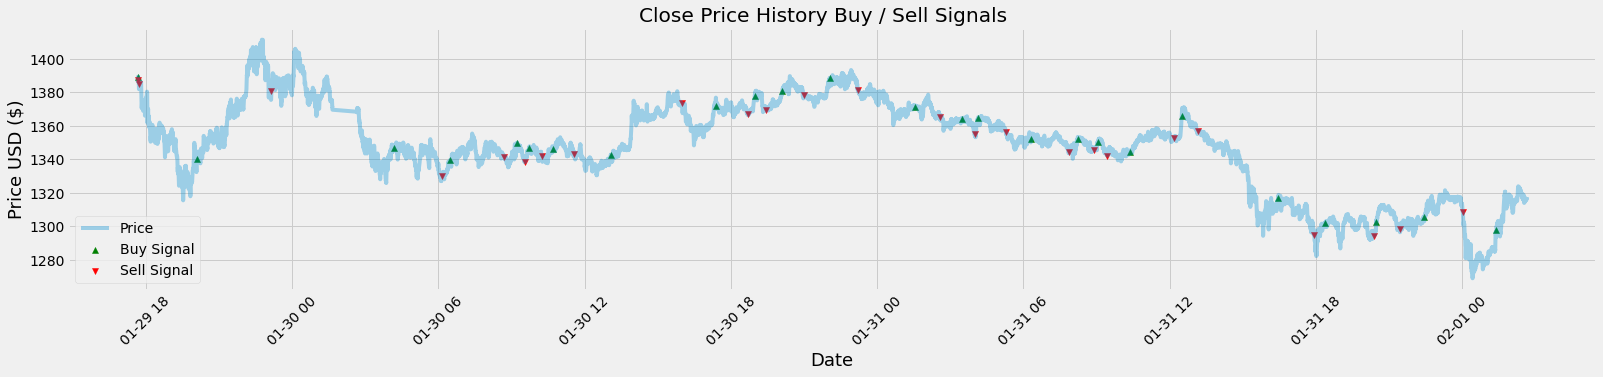

2021-01-29T17:43:00Z Bought at 1389.93  selling at 1379.72 for profit: -12.210000000000036
2021-01-29T23:07:45Z Bought at 1338.525  selling at 1383.56 for profit: 43.034999999999854
2021-01-30T06:09:00Z Bought at 1346.025  selling at 1332.96 for profit: -15.065000000000055
2021-01-30T08:41:00Z Bought at 1335.86  selling at 1345.71 for profit: 7.850000000000136
2021-01-30T09:33:15Z Bought at 1353.885  selling at 1338.545 for profit: -17.339999999999918
2021-01-30T10:14:30Z Bought at 1342.99  selling at 1338.175 for profit: -6.815000000000055
2021-01-30T11:35:00Z Bought at 1341.895  selling at 1343.3 for profit: -0.5950000000000273
2021-01-30T15:59:45Z Bought at 1342.91  selling at 1376.98 for profit: 32.069999999999936
2021-01-30T18:43:15Z Bought at 1372.845  selling at 1370.385 for profit: -4.460000000000036
2021-01-30T19:27:15Z Bought at 1378.605  selling at 1370.005 for profit: -10.599999999999909
2021-01-30T20:59:45Z Bought at 1380.425  selling at 1378.46 for profit: -3.964999999999

In [21]:
# Function to test the crossover driven profits of the macd and signal lines
def mac_daddy_tester(macd, signal, df):
    bought = False
    sumwin = 0
    transactions = []
    for i in range(1, len(signal)):
        if ( (macd.iat[i] > signal.iat[i]) and (macd.iat[i-1] <= signal.iat[i-1]) and bought == False):
            # print("Crossed above, time to buy", i)
            bought = df.iat[i,1]
        if ( (macd.iat[i] < signal.iat[i]) and (macd.iat[i-1] >= signal.iat[i-1]) and bought):
            # print("Crossed below, time to sell", i)
            print(df.iat[i,0], "Bought at", bought, " selling at", df.iat[i,1], "for profit:", df.iat[i,1] - bought - 2)
            transactions.append(df.iat[i,1] - bought)
            sumwin = sumwin + df.iat[i,1] - bought - 1
            bought = False 
    return(sumwin, transactions)


#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if MACD > signal line  then buy else sell
      if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['price'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif signal['MACD'][i] < signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['price'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)


#Create buy and sell columns
x = buy_sell(df)
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]

# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2*2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['price'],  label='Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend( loc='lower left')
plt.show()

r = mac_daddy_tester(MACD, signal, df)
print("Profit", r[0])
print("trans: ", len(r[1]))
# print(r[1])